In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow
import matplotlib.pyplot as plt

print(tensorflow.__version__)


2.8.0


In [ ]:
#loading dataset

(X_train, y_train),(X_test, y_test)=tf.keras.datasets.cifar10.load_data()

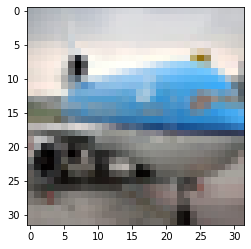

In [ ]:
#visualizing
image= X_train[700]
plt.imshow(image)
plt.show()

In [ ]:
#data preprocessing

X_train=X_train/255
X_test= X_test/255

In [ ]:
#building the model

model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),   #dropout layer for dropout regularization
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [ ]:
#model visualization

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

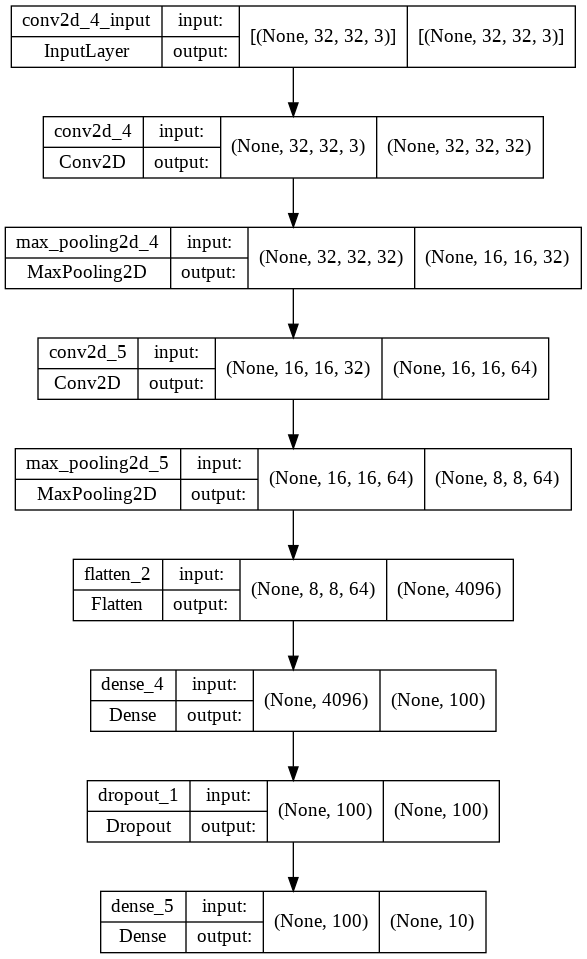

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
#compiling model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Early Stopping Callback

from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=2)
]

#model checkpoint callback
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

callbacks=[
           EarlyStopping(patience=2),
           model_checkpoint_callback

]

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
another_saved_model = tf.keras.models.load_model(checkpoint_filepath)

In [ ]:
#training the model

history = model.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test),callbacks=callbacks)
#am not using 600 or 100 epochs cus its taking too much time
#have used early stopping callback so its stopping at 5th epoch

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6063 - accuracy: 0.7830 - val_loss: 0.9025 - val_accuracy: 0.6960
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5651 - accuracy: 0.7948 - val_loss: 0.9386 - val_accuracy: 0.7064
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5288 - accuracy: 0.8082 - val_loss: 0.9495 - val_accuracy: 0.7000


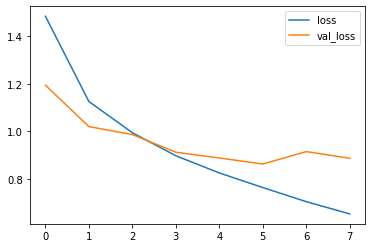

In [ ]:
#plotting

import pandas as pd
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();


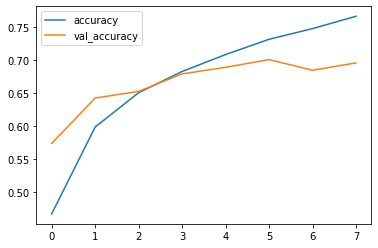

In [ ]:
metrics_df[["accuracy","val_accuracy"]].plot();

In [ ]:
#saving model

model.save("model.h5")

In [ ]:
load_saved_model = tf.keras.models.load_model("model.h5")
load_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              